<a href="https://colab.research.google.com/github/Leenayesh/Leenayesh.github.io/blob/main/ProjectChart9and10plotandregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we should install the World Bank API for rural population in subsaharan African countries. 

In [ ]:
import numpy as np 
import pandas as pd
import requests, json

In [ ]:
countries=['AGO','BEN','BWA','BFA','BDI','CPV', 'CMR', 'CAF', 'TCD', 'COM', 'COG', 'COD','CIV', 'GNQ','ERI','SWZ', 'ETH', 'GAB', 'GMB', 'GIN','GNB','KEN', 'LSO', 'LBR', 'MDG','MWI', 'MLT','MRT','MUS','MOZ','NAM','NER','NGA','RWA','STP','SEN','SYC','SLE','SOM','ZAF','SSD','TZA','TGO','UGA','ZMB','ZWE']

In [ ]:
data=[]
for country in countries:
  url='https://api.worldbank.org/v2/country/'+country+'/indicator/SP.RUR.TOTL.ZS?format=json'
  json_data=requests.get(url).json()[1]
  data.append(json_data)

In [ ]:
flat_data=np.array(data).flatten()
df=pd.json_normalize(flat_data)
df

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,AGO,2020,33.175,,,0,SP.RUR.TOTL.ZS,Rural population (% of total population),AO,Angola
1,AGO,2019,33.823,,,0,SP.RUR.TOTL.ZS,Rural population (% of total population),AO,Angola
2,AGO,2018,34.486,,,0,SP.RUR.TOTL.ZS,Rural population (% of total population),AO,Angola
3,AGO,2017,35.161,,,0,SP.RUR.TOTL.ZS,Rural population (% of total population),AO,Angola
4,AGO,2016,35.851,,,0,SP.RUR.TOTL.ZS,Rural population (% of total population),AO,Angola
...,...,...,...,...,...,...,...,...,...,...
2295,ZWE,1975,80.127,,,0,SP.RUR.TOTL.ZS,Rural population (% of total population),ZW,Zimbabwe
2296,ZWE,1974,80.600,,,0,SP.RUR.TOTL.ZS,Rural population (% of total population),ZW,Zimbabwe
2297,ZWE,1973,81.126,,,0,SP.RUR.TOTL.ZS,Rural population (% of total population),ZW,Zimbabwe
2298,ZWE,1972,81.640,,,0,SP.RUR.TOTL.ZS,Rural population (% of total population),ZW,Zimbabwe


In [ ]:
df.to_csv("RuralPopulation.csv")

I sorted the csv file on excel by date and only kept 2019 values for each country. 

In [ ]:
df1=pd.read_csv('/content/DP_LIVE_09012022145338938.csv')
df2=pd.read_csv('/content/projectchart9plot.csv')
df1
df1=df1.rename(columns = {'LOCATION':'countryiso3code'})


In [ ]:
df3 = pd.merge(df1, df2)
df3.drop(df3.index[40], inplace=True)
df3.drop(df3.index[18], inplace=True)

df3


,countryiso3code,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,Unnamed: 0,Unnamed: 2,rural population (% of total),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,ETH,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.50,NaN,801,2019,78.775,NaN,NaN,0,SP.RUR.TOTL.ZS,Rural population (% of total population),ET,Ethiopia
1,MOZ,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,1451,2019,63.472,NaN,NaN,0,SP.RUR.TOTL.ZS,Rural population (% of total population),MZ,Mozambique
2,NGA,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,1601,2019,48.843,NaN,NaN,0,SP.RUR.TOTL.ZS,Rural population (% of total population),NG,Nigeria
3,ZAF,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.50,NaN,1951,2019,33.144,NaN,NaN,0,SP.RUR.TOTL.ZS,Rural population (% of total population),ZA,South Africa
4,TZA,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,2051,2019,65.500,NaN,NaN,0,SP.RUR.TOTL.ZS,Rural population (% of total population),TZ,Tanzania
5,ZMB,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.50,NaN,2201,2019,55.928,NaN,NaN,0,SP.RUR.TOTL.ZS,Rural population (% of total population),ZM,Zambia
6,AGO,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,1,2019,33.823,NaN,NaN,0,SP.RUR.TOTL.ZS,Rural population (% of total population),AO,Angola
7,BEN,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.50,NaN,51,2019,52.139,NaN,NaN,0,SP.RUR.TOTL.ZS,Rural population (% of total population),BJ,Benin
8,BWA,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,101,2019,29.828,NaN,NaN,0,SP.RUR.TOTL.ZS,Rural population (% of total population),BW,Botswana
9,BFA,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,151,2019,70.020,NaN,NaN,0,SP.RUR.TOTL.ZS,Rural population (% of total population),BF,Burkina Faso


In [ ]:
df3.to_csv("Projectplot9.csv")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
x = df3['Urban population']
y = df3['Value']
df3

,countryiso3code,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,Unnamed: 0,date,Urban population,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,country
0,ETH,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.50,NaN,801,2019,21.225,NaN,NaN,0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),ET,Ethiopia
1,MOZ,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,1451,2019,36.528,NaN,NaN,0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),MZ,Mozambique
2,NGA,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,1601,2019,51.157,NaN,NaN,0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),NG,Nigeria
3,ZAF,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.50,NaN,1951,2019,66.856,NaN,NaN,0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),ZA,South Africa
4,TZA,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,2051,2019,34.500,NaN,NaN,0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),TZ,Tanzania
5,ZMB,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.50,NaN,2201,2019,44.072,NaN,NaN,0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),ZM,Zambia
6,AGO,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,1,2019,66.177,NaN,NaN,0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),AO,Angola
7,BEN,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.50,NaN,51,2019,47.861,NaN,NaN,0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),BJ,Benin
8,BWA,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,101,2019,70.172,NaN,NaN,0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),BW,Botswana
9,BFA,VIOLWOMEN,LAWDOMVIOL,IDX,A,2019,0.75,NaN,151,2019,29.980,NaN,NaN,0,SP.URB.TOTL.IN.ZS,Urban population (% of total population),BF,Burkina Faso


Text(0.5, 1.0, 'Relationship between domestic violence laws and urbanisation')

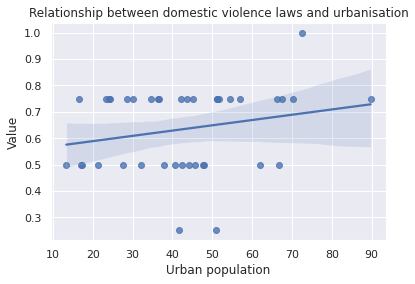

In [ ]:
sns.regplot(x='Urban population',y='Value', data = df3)
plt.title('Relationship between domestic violence laws and urbanisation')

In [ ]:
from scipy.stats import linregress

In [ ]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=df3['Urban population'], y=df3['Value'])

In [ ]:
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

y =  0.0  * x +  0.55
R² =  0.05


In [ ]:
df3.to_csv('ProjectChart9and10.csv')